Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Stablishing routes, you need to copy and paste your path

In [3]:
df_games = pd.read_csv("../../data/cleaned/cleaned_games.csv")

In [4]:
df_char = pd.read_csv("../../data/cleaned/cleaned_characters.csv")

#df_char.info()

In [6]:
df_sex = pd.read_csv("../../data/cleaned/cleaned_characters.csv")
#df_sex.info()

Removing duplicates

In [7]:

df_char_cleaned = df_char.drop_duplicates()
df_sex_cleaned = df_sex.drop_duplicates()
df_games_cleaned = df_games.drop_duplicates()

#### Variables that we are going to use, they are along the code:

In [64]:
# df_non_b = df_char[df_char['Gender'] == 'Non-binary'][['Gender', 'Game']]
# df_sex.rename(columns={'character_id': 'Id'}, inplace=True) #renaming columns so joins are easiest
# df_merged = pd.merge(df_char, df_sex, on ='Id')
# gender_age_distribution = df_char.groupby(['Age_range', 'Gender']).size().unstack().fillna(0)
# df_merged_g = pd.merge(df_merged, df_games, left_on='Game', right_on='Game_Id')

First stats

In [65]:
#df_sex.describe()

In [66]:
#df_char.describe()

More examples

In [67]:
#df_char.head(10)

I don't agree with zelda as no trophy, also she's kidnapped

In [68]:
#df_sex.head(10)

In [69]:
df_char.value_counts("Gender")

Gender
Male          393
Female        203
Non-binary     33
Custom          8
Name: count, dtype: int64

Checking from what games comes non-binary

In [70]:
df_non_b = df_char[df_char['Gender'] == 'Non-binary'][['Gender', 'Game']]
#print(df_non_b)

# CHARACTER DATA QUESTIONS (this part is on simone branch, this is me testing)

Merging character and sexualization tables, when grouped by gender, what can we learn about designers clothing choices for characters? Which (if any) gender is most likely to wear sexualized clothing?
Joining gender-sex_cloths and then doing a sum 

In [21]:
# I need to change column names to Id
df_sex.rename(columns={'character_id': 'Id'}, inplace=True)

In [20]:
df_sex

,character_id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0
...,...,...,...,...,...,...
632,KBOS_Beni,0,0,0,0,0
633,KBOS_Taro,0,0,0,0,0
634,KBOS_Rusu,0,0,0,0,0
635,KBOS_Adira,0,0,0,0,0


In [18]:
df_sex.columns

Index(['character_id', 'Sexualized_clothing', 'Trophy', 'Damsel in Distress',
       'Sexualized Cutscenes', 'Total'],
      dtype='object')

# Creating df_merged variable through join 

In [22]:
#CREATING DF_MERGED VARIABLE
df_merged = pd.merge(df_char, df_sex, on ='Id')
df_merged

,Name,Gender,Game,Age_range,Playable,Sexualization_total,Id,Species,Alliance,Function,Romantic_Interest,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,Farah,Female,CODMW,Adult,1,0,CODMW_Farah,Human,Protagonist,PA,0,0,0,0,0,0
1,Protagonist,Custom,PSS,Teenager,1,0,PSS_Protagonist,Human,Protagonist,PA,0,0,0,0,0,0
2,Magnolia,Female,PSS,Elderly,0,0,PSS_Magnolia,Human,Protagonist,SC,0,0,0,0,0,0
3,Sonia,Female,PSS,Adult,0,0,PSS_Sonia,Human,Protagonist,SC,0,0,0,0,0,0
4,Marnie,Female,PSS,Teenager,0,0,PSS_Marnie,Human,Both,MC,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,Beni,Male,KBOS,Infant,0,0,KBOS_Beni,Human,Protagonist,SC,0,0,0,0,0,0
632,Taro,Male,KBOS,Child,0,0,KBOS_Taro,Human,Protagonist,SC,0,0,0,0,0,0
633,Rusu,Male,KBOS,Adult,0,0,KBOS_Rusu,Human,Protagonist,SC,0,0,0,0,0,0
634,Adira,Female,KBOS,Adult,0,0,KBOS_Adira,Human,Protagonist,SC,0,0,0,0,0,0


#### Can't join with df_games !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [75]:
df_games

,Unnamed: 0,Game_Id,Title,Release,Developer,Country,Protagonist,Protagonist_Non_Male,Percentage_non_male
0,0,GTAV,Grand Theft Auto V,Sep-13,Rockstar North,GBR,3,0,18%
1,1,PSS,Pokémon Sword/Shield,Nov-19,Game Freak,JPN,1,1,56%
2,2,CODMW,Call of Duty: Modern Warfare,Oct-19,Infinity Ward,USA,3,1,17%
3,3,RDR2,Red Dead Redemption 2,Oct-18,Rockstar Studios,USA,1,0,29%
4,4,SMO,Super Mario Odyssey,Oct-17,Nintendo EDP,JPN,1,0,40%
...,...,...,...,...,...,...,...,...,...
59,59,TBOIR,The Binding of Isaac: Rebirth,Nov-14,Nicalis,USA,1,0,36%
60,60,COL,Child of Light,Apr-14,Ubisoft Montreal,CAN,1,1,54%
61,61,FLR,Florence,Feb-18,Mountains,USA,1,1,50%
62,62,MSMMM,Marvel's Spider-Man: Miles Morales,Nov-20,Insomniac Games,USA,1,0,42%


In [16]:
#merging with db_game
df_merged_g = pd.merge(df_merged, df_games, left_on='Game', right_on='Game_Id')
#empty data cos there is no PK in common

NameError: name 'df_merged' is not defined

### 1C. What are the trends, if any, when gender percentage is split by age range?

In [10]:

#gender  % by age range
gender_age_distribution = df_char.groupby(['Age_range', 'Gender']).size().unstack().fillna(0)
gender_age_distribution_percentage = gender_age_distribution.div(gender_age_distribution.sum(axis=1), axis=0) * 100




Visual % - age

<Figure size 1000x1000 with 0 Axes>

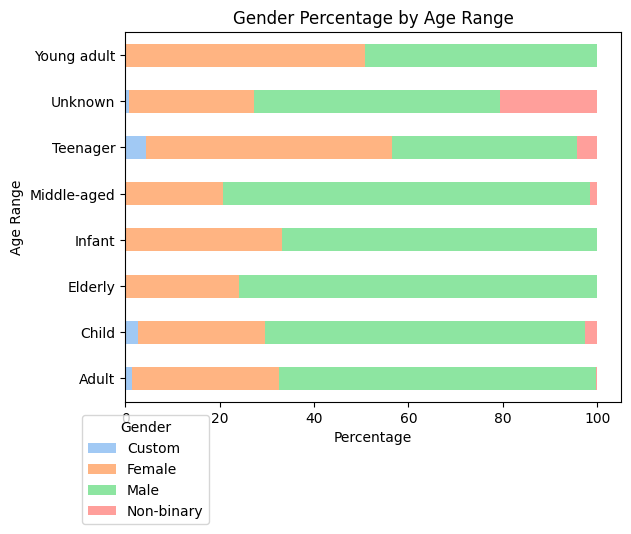

In [37]:
# Visualization of gender percentage by age range with the legend further down to make 'Adult' readable
colours = sns.color_palette('pastel')
custom_order = ['Infant','Child','Teenager','Young adult','Adult','Middle-aged','Elderly','Unknown']
plt.figure(figsize=(10, 10))
gender_age_distribution_percentage.plot(kind='barh', stacked=True, color=colours)
plt.title('Gender Percentage by Age Range')
plt.xlabel('Percentage')
plt.ylabel('Age Range')
plt.legend(title='Gender', loc='lower left', bbox_to_anchor=(-0.1, -0.35))
plt.show()


On women, number of chars: Teenager > young adult > infant

### 2C. Playable character probability by gender

In [79]:
playable_gender_distribution = df_char.groupby(['Gender', 'Playable']).size().unstack().fillna(0)
playable_gender_percentage = playable_gender_distribution.div(playable_gender_distribution.sum(axis=1), axis=0) * 100

<Figure size 1000x600 with 0 Axes>

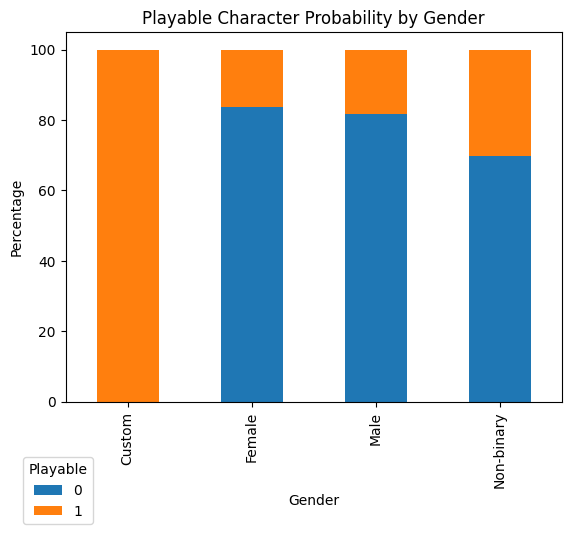

In [80]:
#visualization
plt.figure(figsize=(10, 6))
playable_gender_percentage.plot(kind='bar', stacked=True)
plt.title('Playable Character Probability by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Playable', loc='lower left', bbox_to_anchor=(-0.1, -0.35))
plt.show()

### 3C. General pattern in sexualization by gender

In [40]:
gender_sexualization = df_char.groupby('Gender')['Sexualization_total'].mean()
gender_sexualization_perc = gender_sexualization*100

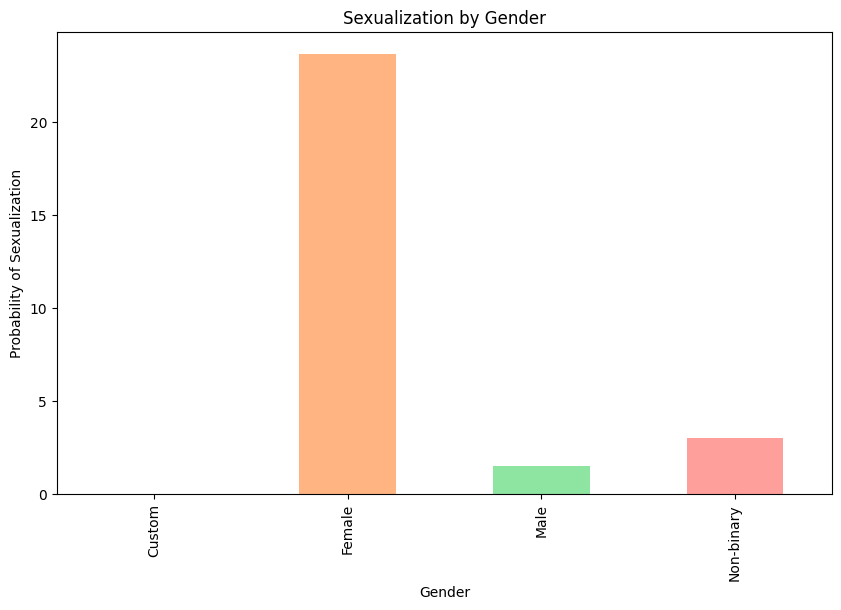

In [43]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 6))
gender_sexualization_perc.plot(kind='bar', color=colors)
plt.title('Sexualization by Gender')
plt.xlabel('Gender')
plt.ylabel('Probability of Sexualization')
plt.show()

(:

# SEXUALIZATION DATA QUESTIONS.

In [83]:
df_char.columns
df_sex.columns

Index(['Id', 'Sexualized_clothing', 'Trophy', 'Damsel in Distress',
       'Sexualized Cutscenes', 'Total'],
      dtype='object')

### 1Q.S. Merging character and sexualization tables, when grouped by gender, what can we learn about designers clothing choices for characters? Which (if any) gender is most likely to wear sexualized clothing?

In [32]:
Sexualized_clothing_perc = df.merged[Sexualized_clothing]
gender_sexualized_clothing = df_merged.groupby('Gender')['Sexualized_clothing_perc'].mean()
# gender_sexualized_clothing

#### visualization of gender most likely to wear sexualized clothing:

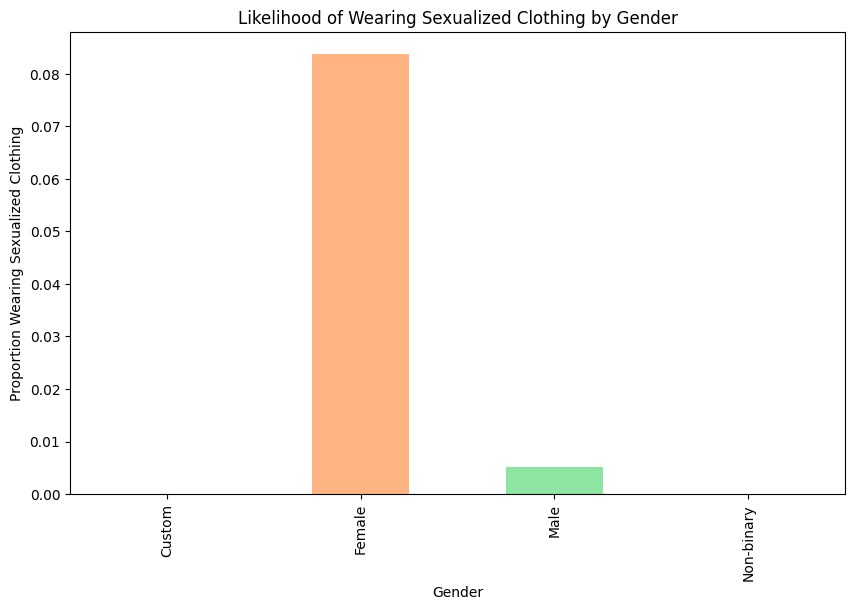

In [30]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 6))
gender_sexualized_clothing.plot(kind='bar', color=colors)
plt.title('Likelihood of Wearing Sexualized Clothing by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion Wearing Sexualized Clothing')
plt.show()

- **Female characters** are significantly more likely to wear sexualized clothing compared to characters of other genders.
  The proportion of female characters wearing sexualized clothing is around 8%, which is the highest among all gender categories.
-  **Male characters** have a much lower likelihood of wearing sexualized clothing.
    The proportion of male characters wearing sexualized clothing is below 1%, indicating that it is quite rare for male characters to be depicted in this manner. 
- **Custom and non-binary** characters are almost nonexistent in the context of sexualized clothing

The data reveals a significant gender bias in the portrayal of characters with sexualized clothing, heavily favoring female characters. This trend highlights an area of concern regarding the depiction and representation of genders in video games, suggesting a need for more balanced and fair character design practices.


### 2Q.S. From what games comes non_binary characters ? Merging with countries that have more non-binary countries.


In [27]:
#New variable df : non_binary_games
non_binary_games = df_merged[df_merged['Gender'] == 'Non-binary']['Game'].value_counts()

#### visualization non_binary_games

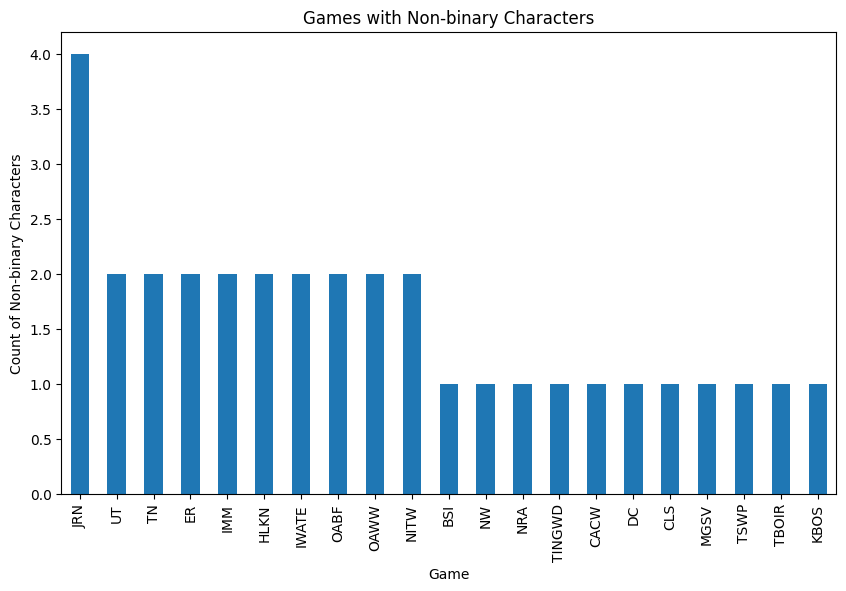

In [28]:
plt.figure(figsize=(10, 6))
non_binary_games.plot(kind='bar')
plt.title('Games with Non-binary Characters')
plt.xlabel('Game')
plt.ylabel('Count of Non-binary Characters')
plt.show()

Games with the Most Non-binary Characters:

    The game denoted by the abbreviation JRN has the highest count of non-binary characters, with a total of 4.
    Several other games such as UT, TN, TR, ER, and IMM each have 2 non-binary characters.

Distribution Across Games:

    The distribution shows that non-binary characters are present in a variety of games, but most games only feature 1 or 2 non-binary characters.
    The majority of the games listed have at least one non-binary character, indicating some level of representation across different titles.

Further Analysis

To gain more insight into the representation of non-binary characters, it would be beneficial to:

    Identify Developers:
        Determine which developers are responsible for these games and see if there is a trend in which developers are more inclusive of non-binary characters.
    Country of Origin:
        Investigate the country of origin for these developers to see if certain countries are more likely to include non-binary characters in their games.

PD: I've tried but I'm getting all kind of errors when I've to connect the parameters

### 3Q.S. Through the years which year had the most sexualized clothing?

Here we need to refeer to game db, so:

In [88]:
#df_merged

In [89]:
#df_merged_g.columns

In [90]:
year_sexualized_clothing = df_merged_g.groupby('Release')['Sexualized_clothing'].sum().sort_index()
#year_sexualized_clothing

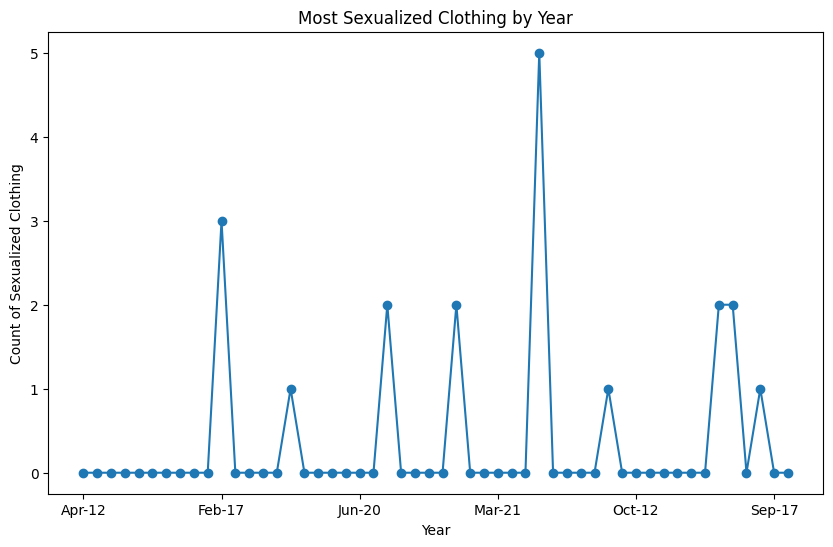

In [91]:

plt.figure(figsize=(10, 6))
year_sexualized_clothing.plot(kind='line', marker='o')
plt.title('Most Sexualized Clothing by Year')
plt.xlabel('Year')
plt.ylabel('Count of Sexualized Clothing')
plt.show()


##### The graph highlights the variability in the depiction of sexualized clothing in video game characters over the years. Significant peaks in 2017 and 2021 suggest particular trends or releases that contributed to higher counts of sexualized clothing. This analysis provides a foundation for further investigation into the reasons behind these trends and their implications in the gaming industry.


Adjusting the release column (x axis) into datetime format is making it impossible for me. Need sos here.

2015 and 2019 are the TOP ones

### 4Q_S. Who are the characters who have more sexualized clothes?

In [92]:
# grouping by: name, function, and gender, then sum the amount of sexualized clothing
characters_sexualized_clothing_all_with_gender = df_merged.groupby(['Name', 'Function', 'Gender'])['Sexualized_clothing'].sum()

In [93]:
# Creating a new df from the sorted series for easier plotting
df_top_characters = characters_sexualized_clothing_all_with_gender.reset_index()

In [94]:
df_char.columns

Index(['Name', 'Gender', 'Game', 'Age_range', 'Playable',
       'Sexualization_total', 'Id', 'Species', 'Alliance', 'Function',
       'Romantic_Interest'],
      dtype='object')

In [95]:
# Group the data by character name, function, and gender, then sum the amount of sexualized clothing
characters_sexualized_clothing_all_with_gender = df_merged.groupby(['Name', 'Function', 'Gender'])['Sexualized_clothing'].sum()

# Sort the results in descending order to identify characters with the most sexualized clothing
characters_sexualized_clothing_sorted_all_with_gender = characters_sexualized_clothing_all_with_gender.sort_values(ascending=False).head(10)

# Crear un DataFrame a partir de la serie ordenada
df_top_characters = characters_sexualized_clothing_sorted_all_with_gender.reset_index()
# Combinando 'Name', 'Function', y 'Gender' en una sola columna para mejor legibilidad en el gráfico
df_top_characters['Character_Info'] = df_top_characters['Name'] + ' (' + df_top_characters['Function'] + ', ' + df_top_characters['Gender'] + ')'












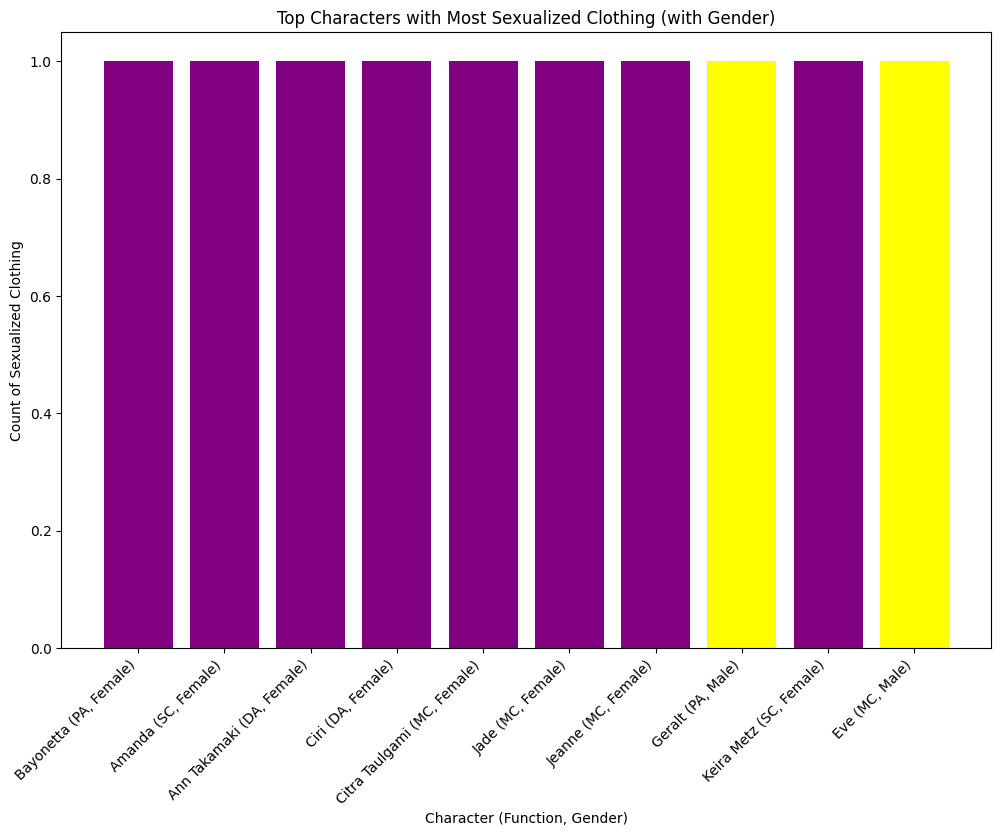

In [96]:
# Assign colors based on gender
colors = df_top_characters['Gender'].apply(lambda x: 'yellow' if x == 'Male' else 'purple')
# Visualization
plt.figure(figsize=(12, 8))
plt.bar(df_top_characters['Character_Info'], df_top_characters['Sexualized_clothing'], color=colors)
plt.title('Top Characters with Most Sexualized Clothing (with Gender)')
plt.xlabel('Character (Function, Gender)')
plt.ylabel('Count of Sexualized Clothing')
plt.xticks(rotation=45, ha='right')
plt.show()


- The characters come from various functions within the games, such as Main Characters (MC), Playable Characters (PA), Side Characters (SC), and Deuteragonists (DA).
This indicates that the depiction of sexualized clothing is not restricted to a particular role within the game but can be found across different character functions.
- The bar chart underscores a notable trend in video game character design, where female characters are disproportionately depicted with sexualized clothing. This trend spans across different character roles, indicating a broader pattern within the industry. Understanding this trend is crucial for discussions about representation and gender bias in video games.

### 5Q_SWhat age range are most likely to have romantic_interest?



In [97]:
#grouping by romantic_interest + age_range
age_romantic_interest = df_merged[df_merged['Romantic_Interest'] == 1].groupby('Age_range').size()

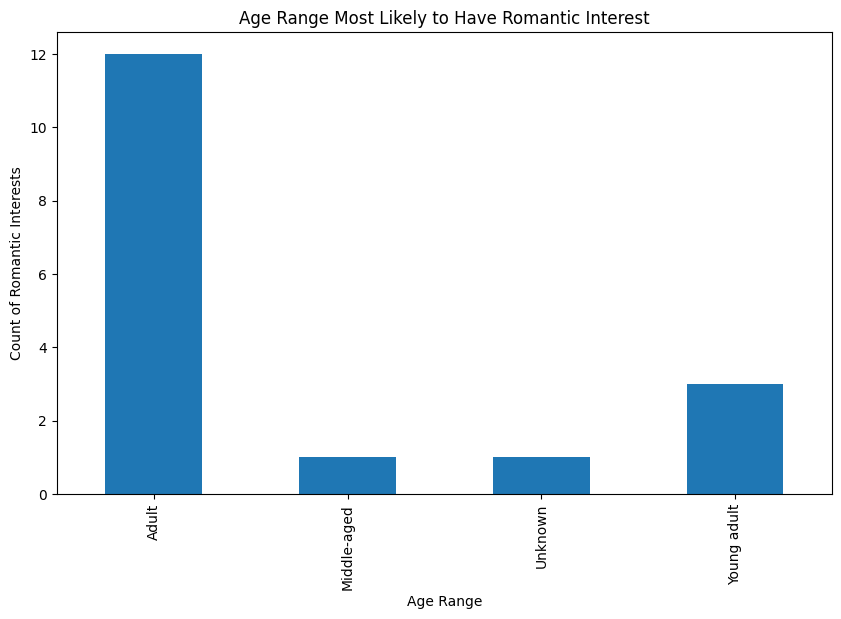

Age_range
Adult          12
Middle-aged     1
Unknown         1
Young adult     3
dtype: int64


In [98]:
# visuals
plt.figure(figsize=(10, 6))
age_romantic_interest.plot(kind='bar')
plt.title('Age Range Most Likely to Have Romantic Interest')
plt.xlabel('Age Range')
plt.ylabel('Count of Romantic Interests')
plt.show()

# results
print(age_romantic_interest)

- Adult characters (ages 18 and above) have the highest count of romantic interests, with a total of 12.
- Young adult characters also show a notable presence with 3 counts.
- Middle-aged and unknown age range characters have minimal representation in terms of romantic interest.

##### Are they also getting sexualized clothes?

In [99]:
# merging and filter on Romantic_Interest == 1 
romantic_characters = df_merged[df_merged['Romantic_Interest'] == 1]

# group by age + sexualized_clothing
age_sexualized_clothing = romantic_characters.groupby('Age_range')['Sexualized_clothing'].sum()
age_sexualized_clothing


Age_range
Adult          3
Middle-aged    1
Unknown        0
Young adult    0
Name: Sexualized_clothing, dtype: int64

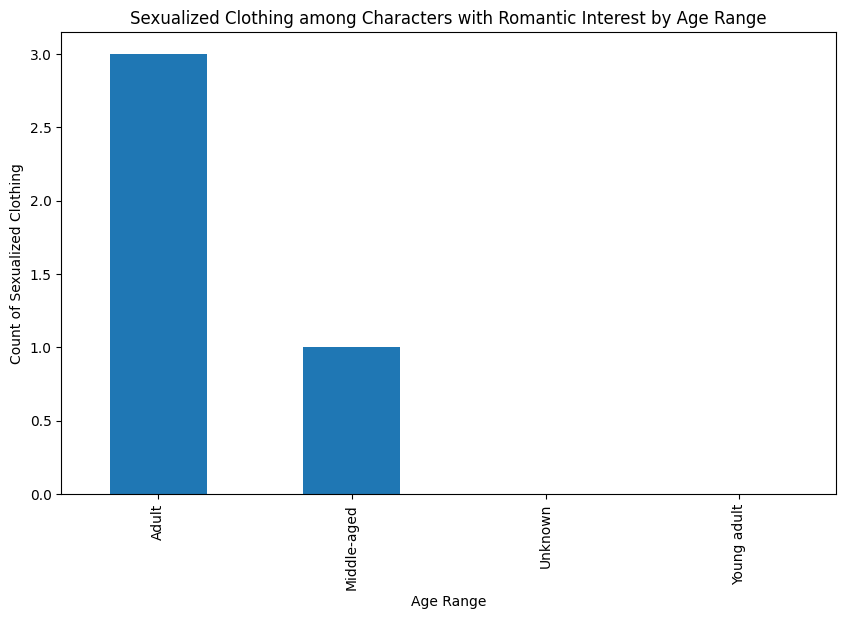

In [100]:
# Visuals
plt.figure(figsize=(10, 6))
age_sexualized_clothing.plot(kind='bar')
plt.title('Sexualized Clothing among Characters with Romantic Interest by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count of Sexualized Clothing')
plt.show()


- Adult characters again dominate, with 3 instances of sexualized clothing.
- Middle-aged characters have 1 instance.
- Other age ranges, such as young adult and unknown, do not show any instances of sexualized clothing among characters with romantic interests.

##### What game has the most character with as romantic interest and age of the characters?

In [101]:
# grouping by game and chars with romantic interest
game_romantic_interest = romantic_characters.groupby('Game').size().sort_values(ascending=False)
game_romantic_interest

Game
FC3       2
ITT       2
TLOU2     2
ER        1
GTAV      1
FLR       1
HLM       1
NW        1
SK        1
PP        1
SMO       1
TINGWD    1
TW3       1
UC4       1
dtype: int64

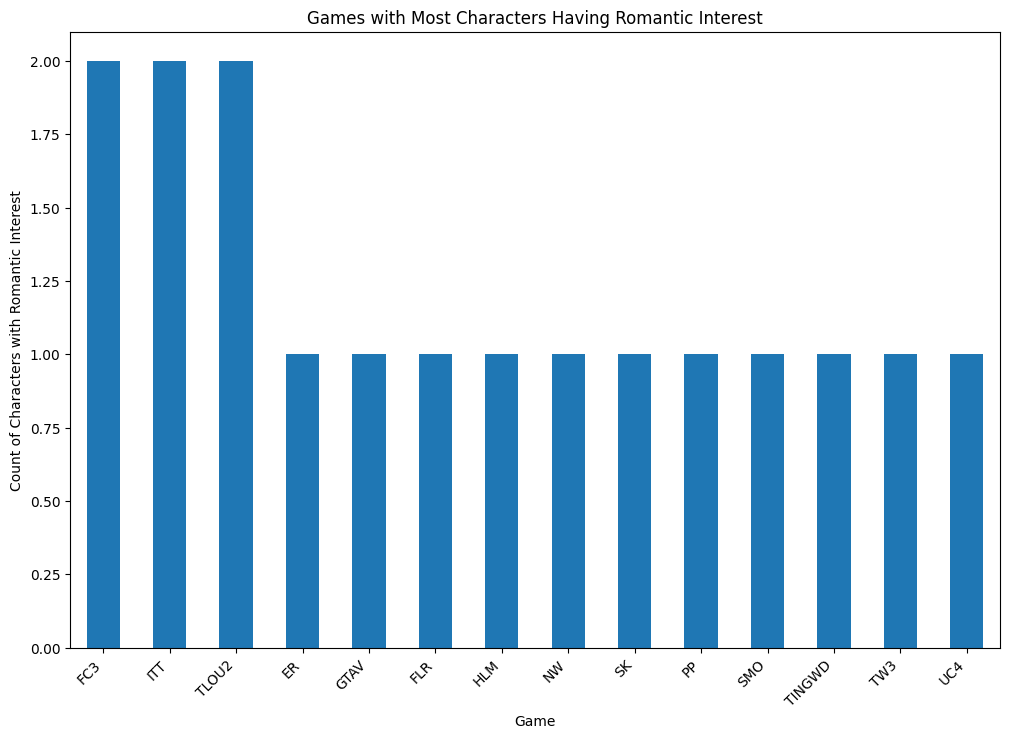

In [102]:
# Visuals
plt.figure(figsize=(12, 8))
game_romantic_interest.plot(kind='bar')
plt.title('Games with Most Characters Having Romantic Interest')
plt.xlabel('Game')
plt.ylabel('Count of Characters with Romantic Interest')
plt.xticks(rotation=45, ha='right')
plt.show()


- Far Cry 3 (FC3) and It Takes Two (ITT) have the highest count, each with more than 2 characters having romantic interests.
- Other games like The Last of Us Part II (TLOU2), Elden Ring (ER), and Grand Theft Auto V (GTAV) have characters with romantic interests, but in lower counts.

##### Does gender influence the likelihood of a character being considered a love interest?

In [103]:
#grouping by gender + romantic interest
gender_romantic_interest = df_merged.groupby('Gender')['Romantic_Interest'].mean()

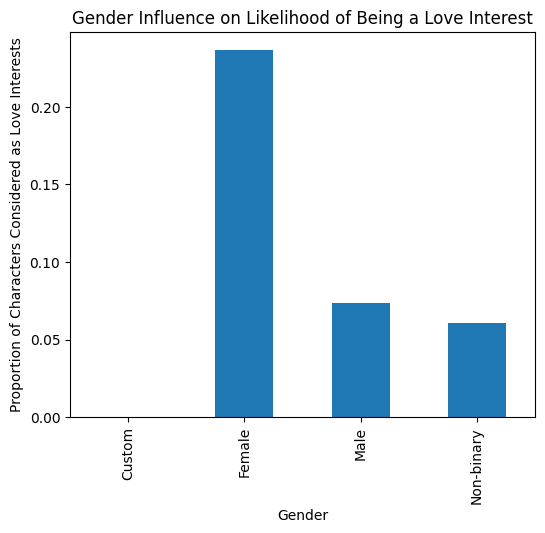

In [104]:
#visuals
plt.figure(figsize=(6, 5))
gender_romantic_interest.plot(kind='bar')
plt.title('Gender Influence on Likelihood of Being a Love Interest')
plt.xlabel('Gender')
plt.ylabel('Proportion of Characters Considered as Love Interests')
plt.show()

- Female characters are significantly more likely to be considered as love interests, with a proportion exceeding 20%.
- Male characters and non-binary characters have much lower proportions, each below 10%.

This suggests a strong gender bias towards female characters being depicted as love interests in games.

## Conclusion:

The analysis of these graphs reveals a **strong tendency for adult and female characters** to be more frequently involved in romantic interests and to be depicted in sexualized clothing. This indicates potential biases in character design and storytelling within the video game industry, which can have broader implications on how different genders and age groups are represented in media.